In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-mask-detection/Dataset/without_mask/2664.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2539.png
/kaggle/input/face-mask-detection/Dataset/without_mask/1231.png
/kaggle/input/face-mask-detection/Dataset/without_mask/1017.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2437.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2015.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2300.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2673.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2823.png
/kaggle/input/face-mask-detection/Dataset/without_mask/1522.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2064.png
/kaggle/input/face-mask-detection/Dataset/without_mask/641.png
/kaggle/input/face-mask-detection/Dataset/without_mask/1088.png
/kaggle/input/face-mask-detection/Dataset/without_mask/173.png
/kaggle/input/face-mask-detection/Dataset/without_mask/2851.png
/kaggle/input/face-mask-detection/Dataset/

 **Face mask detection using CNN**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import cv2
from tqdm import tqdm

1. Preparing Dataset

In [ ]:
encoding

In [3]:
label_code = {'mask_weared_incorrect':0,'with_mask':1,'without_mask':2}
label_decode = ['mask_weared_incorrect','with_mask','without_mask']

creating numpy array for X and y

In [4]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 1
SAMPLES = 8982
CATEGORIES = 3 # 1 for binary classification problem

X = np.zeros((SAMPLES, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype='float32')       #np.uint8 float32
y = np.zeros((SAMPLES, CATEGORIES), dtype='int32')                                 #np.bool  uint8

loading files to numpy arrays

In [5]:
i = 0
for dirname, _, filenames in os.walk('../input/face-mask-detection/Dataset'):
    for filename in tqdm(filenames):
        _path = os.path.join(dirname, filename)
        _img = cv2.imread(_path,0)
        
        _img = cv2.resize(_img,(IMG_WIDTH,IMG_HEIGHT))
        _img = _img.astype('float32')
        _img = _img.reshape(128,128,1)
        _img = _img/255.0
        
        X[i,:,:,:1]  = _img
        _label = dirname.split('/')[-1]
        _index = label_code[_label]
        y[i,_index] = 1
        i += 1

0it [00:00, ?it/s]
100%|██████████| 2994/2994 [00:23<00:00, 128.80it/s]


split datasets

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7185, 128, 128, 1)
(7185, 3)
(1797, 128, 128, 1)
(1797, 3)


visulising samples

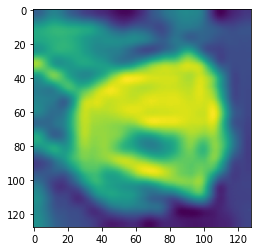

In [7]:
plt.imshow(X_test[0,:,:,:])

In [8]:
j = np.argmax(y_test[0])

print(label_decode[j])

with_mask


2. Model Setup

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(Conv2D(4, (4, 4), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(4, (3, 3), activation='relu'))
model.add(Conv2D(3, (3, 3), activation='relu'))
model.add(Conv2D(3, (3, 3), activation='relu'))
model.add(Conv2D(3, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 8)       80        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 123, 123, 4)       516       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 4)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 59, 59, 4)         148       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 57, 57, 3)         111       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 55, 55, 3)         84        
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 53, 53, 3)        

3. Trainning

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
hist = model.fit(x = X_train, y = y_train, batch_size = 30, validation_data=(X_test,y_test), epochs=35,verbose=1)

Epoch 1/35
240/240 [==============================] - 4s 13ms/step - loss: 0.6341 - accuracy: 0.7312 - val_loss: 0.4475 - val_accuracy: 0.8197
Epoch 2/35
240/240 [==============================] - 2s 10ms/step - loss: 0.3654 - accuracy: 0.8617 - val_loss: 0.3374 - val_accuracy: 0.8637
Epoch 3/35
240/240 [==============================] - 2s 10ms/step - loss: 0.2471 - accuracy: 0.9122 - val_loss: 0.2387 - val_accuracy: 0.9160
Epoch 4/35
240/240 [==============================] - 2s 10ms/step - loss: 0.1948 - accuracy: 0.9322 - val_loss: 0.2839 - val_accuracy: 0.8971
Epoch 5/35
240/240 [==============================] - 2s 10ms/step - loss: 0.1461 - accuracy: 0.9503 - val_loss: 0.2244 - val_accuracy: 0.9265
Epoch 6/35
240/240 [==============================] - 3s 12ms/step - loss: 0.1253 - accuracy: 0.9564 - val_loss: 0.2012 - val_accuracy: 0.9388
Epoch 7/35
240/240 [==============================] - 2s 10ms/step - loss: 0.1084 - accuracy: 0.9623 - val_loss: 0.2456 - val_accuracy: 0.9321

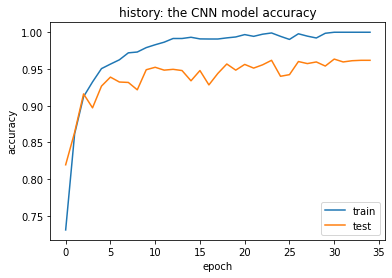

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('history: the CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

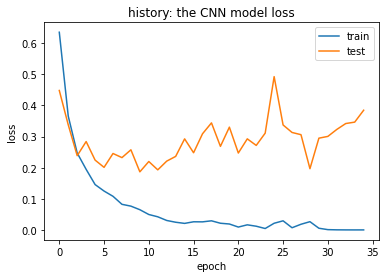

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('history: the CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

5. Prediction on single image

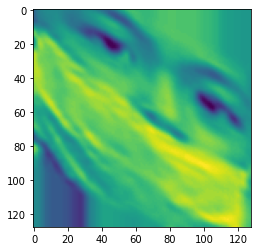

In [47]:
path2 = '../input/face-mask-detection/Dataset/mask_weared_incorrect/1001.png'
img = cv2.imread(path2,0)
img = cv2.resize(img,(128,128))
img = img.astype('float32')
img = img/255.0
#img = np.flip(img,(2))
plt.imshow(img)
img = img.reshape(1,128,128,1)

In [48]:
y1 = model.predict(img)

In [49]:
print(label_decode[np.argmax(y1)])

mask_weared_incorrect


In [50]:
model.save_weights('mask_detec.h5')